## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import radians, cos, sin, asin, sqrt

# Exploration

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
data['id'].nunique()

21420

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


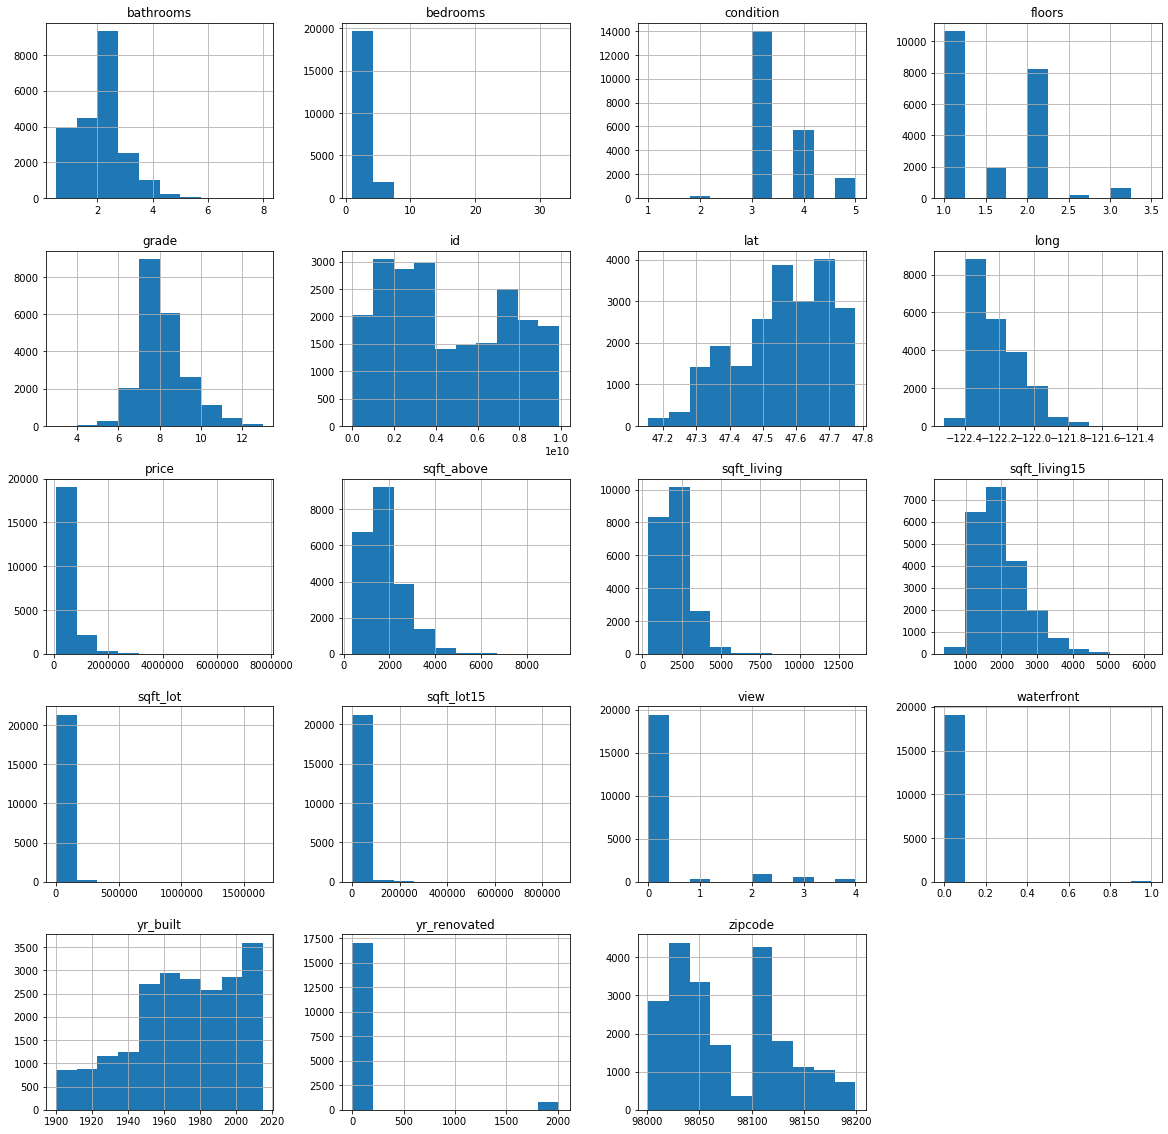

In [6]:
data.hist(figsize=(20,20));

Based on the skews in some of these distributions it seems likely that there are outliers in price, bedrooms, sqft_above, sqft_living, sqft_lot, sqft_lot15. 

Additionally, there are several binomial distributions that should be converted to categorical data. 

During the cleaning process I will also assess the relationship between each independent variable and the dependent variable.

#### Independent Variable- Price

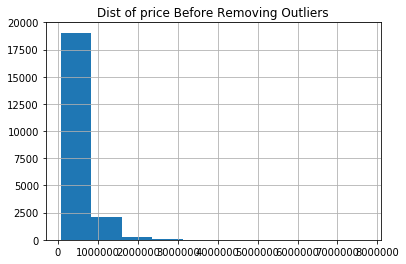

In [7]:
plt.title('Dist of price Before Removing Outliers')
data['price'].hist();

In [8]:
price_cutoff = data['price'].quantile(.925)
price_cutoff

975000.0

In [9]:
data[data['price']>price_cutoff]['price'].describe()

count    1.600000e+03
mean     1.490721e+06
std      6.203572e+05
min      9.760000e+05
25%      1.100000e+06
50%      1.300000e+06
75%      1.650000e+06
max      7.700000e+06
Name: price, dtype: float64

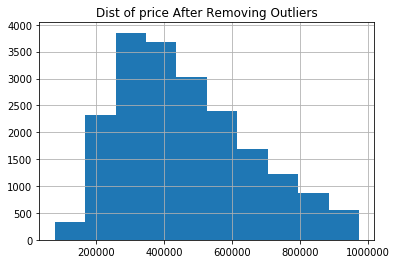

In [10]:
plt.title('Dist of price After Removing Outliers')
data[data['price']<price_cutoff]['price'].hist();

- Outliers Dropped: Houses that sold for more than $975,000 (7.5% of the total data, 1,600 entries)

#### Bedrooms

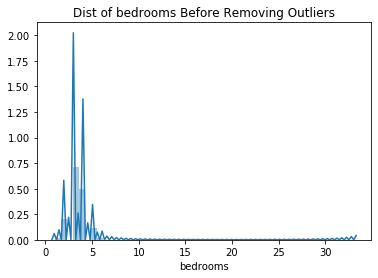

In [11]:
plt.title('Dist of bedrooms Before Removing Outliers')
sns.distplot(data['bedrooms'])
plt.show();

In [12]:
bedrooms_cutoff = 6
data[data['bedrooms']>bedrooms_cutoff].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,57.0,62.000000,62.000000,62.000000,62.000000,62.000000,48.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,4.288724e+09,9.597583e+05,8.032258,3.653226,3851.774194,15790.177419,1.750000,0.0,0.387097,3.451613,8.225806,2953.225806,1957.322581,250.291667,98085.693548,47.617960,-122.255016,2259.161290,12233.903226
std,2.805883e+09,7.185474e+05,3.363096,1.345419,1756.741137,38701.662780,0.548844,0.0,0.947037,0.693705,1.475698,1394.510049,31.689981,669.225591,49.417787,0.085319,0.102465,841.537434,27605.414463
min,2.630003e+08,2.800000e+05,7.000000,1.000000,1620.000000,2400.000000,1.000000,0.0,0.000000,3.000000,6.000000,1040.000000,1901.000000,0.000000,98004.000000,47.319100,-122.392000,1240.000000,1552.000000
25%,1.904350e+09,5.392500e+05,7.000000,2.750000,2822.500000,5470.500000,1.125000,0.0,0.000000,3.000000,7.000000,2010.000000,1929.750000,0.000000,98040.000000,47.573750,-122.326250,1580.000000,4402.500000
50%,3.590980e+09,7.000000e+05,7.000000,3.500000,3465.000000,8572.500000,2.000000,0.0,0.000000,3.000000,8.000000,2675.000000,1962.000000,0.000000,98105.000000,47.630850,-122.292500,2035.000000,7517.000000
75%,6.671850e+09,9.867500e+05,8.000000,4.250000,4330.000000,12514.000000,2.000000,0.0,0.000000,4.000000,9.000000,3462.500000,1978.750000,0.000000,98117.000000,47.672000,-122.187750,2725.000000,10301.250000
max,9.822700e+09,3.300000e+06,33.000000,8.000000,13540.000000,307752.000000,3.500000,0.0,4.000000,5.000000,12.000000,9410.000000,2013.000000,2013.000000,98199.000000,47.756500,-121.986000,4850.000000,217800.000000


33 bedrooms in a 1620 sqft house seems like it was likely a typo. I'll impute 3 as the number of rooms.  

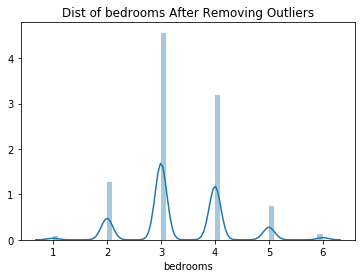

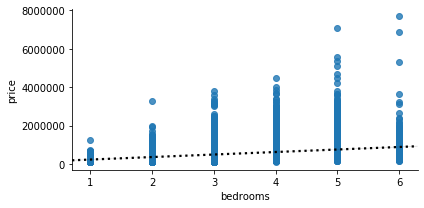

In [13]:
data.loc[data['bedrooms']==33, 'bedrooms']=3
no_outs = data[data['bedrooms']<=bedrooms_cutoff]
plt.title('Dist of bedrooms After Removing Outliers')
sns.distplot(no_outs['bedrooms'])
plt.show();
sns.lmplot(x = 'bedrooms', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 6 bedrooms (62 entries)
- Relationship: Observably linear. Prices rise and number of bedrooms increase. Potentially better accounted for with polynomial factoring.

#### Bathrooms

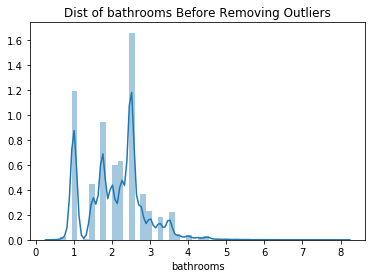

In [14]:
plt.title('Dist of bathrooms Before Removing Outliers')
sns.distplot(data['bathrooms'])
plt.show();

In [15]:
bathrooms_cutoff = data['bathrooms'].quantile(.99)
bathrooms_cutoff

4.25

In [16]:
(data[data['bathrooms']>bathrooms_cutoff]['bathrooms']
 .describe())

count    187.000000
mean       4.902406
std        0.663088
min        4.500000
25%        4.500000
50%        4.500000
75%        5.000000
max        8.000000
Name: bathrooms, dtype: float64

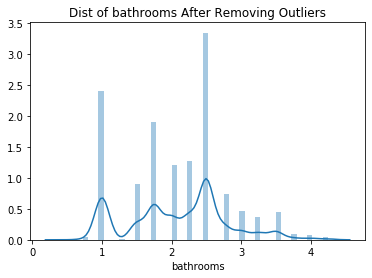

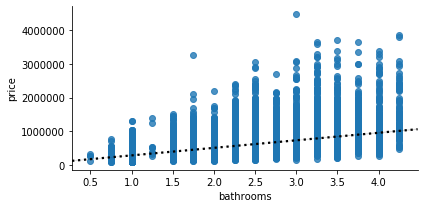

In [17]:
no_outs = data[data['bathrooms']<=bathrooms_cutoff]
plt.title('Dist of bathrooms After Removing Outliers')
sns.distplot(no_outs['bathrooms'])
plt.show();
sns.lmplot(x = 'bathrooms', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 4.25 bathrooms (1% of the data, 187 entries)
- Relationship: Observably linear. Prices rise as number of bathrooms increases.

#### sqft_living

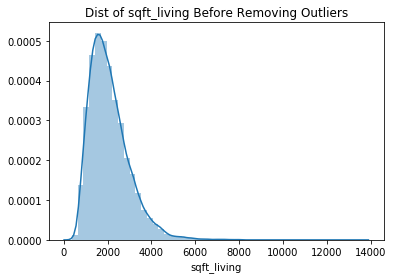

In [18]:
plt.title('Dist of sqft_living Before Removing Outliers')
sns.distplot(data['sqft_living'])
plt.show();

In [19]:
sqft_living_cutoff = data['sqft_living'].quantile(.99)
sqft_living_cutoff

4980.0

In [20]:
(data[data['sqft_living']>sqft_living_cutoff]['sqft_living']
 .describe())

count      215.000000
mean      5965.120930
std       1139.235731
min       5000.000000
25%       5275.000000
50%       5600.000000
75%       6250.000000
max      13540.000000
Name: sqft_living, dtype: float64

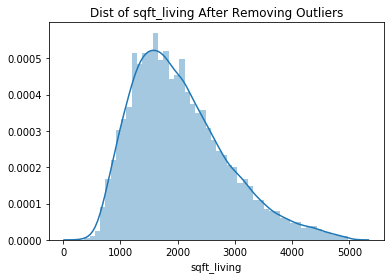

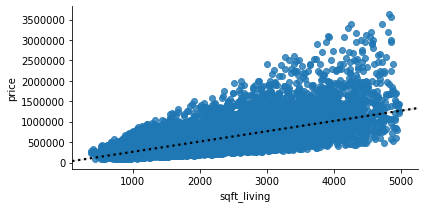

In [21]:
no_outs = data[data['sqft_living']<=sqft_living_cutoff]
plt.title('Dist of sqft_living After Removing Outliers')
sns.distplot(no_outs['sqft_living'])
plt.show();
sns.lmplot(x = 'sqft_living', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 4,980 sqft of living space (1% of the data, 215 entries)
- Relationship: Observably linear. Prices rise as sqft of living space increase. Potentially better accounted for with polynomial factoring.

#### sqft_lot

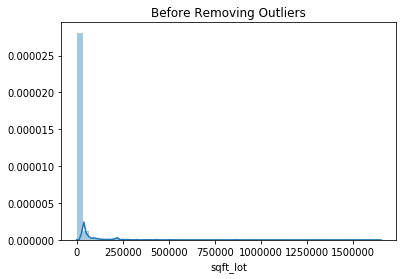

In [22]:
plt.title('Before Removing Outliers')
sns.distplot(data['sqft_lot'])
plt.show();

In [23]:
sqft_lot_cutoff = data['sqft_lot'].quantile(.85)
sqft_lot_cutoff

15000.0

In [24]:
(data[data['sqft_lot']>sqft_lot_cutoff]['sqft_lot']
 .describe())

count    3.239000e+03
mean     6.119121e+04
std      9.425524e+04
min      1.500100e+04
25%      1.906000e+04
50%      3.210900e+04
75%      5.357800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

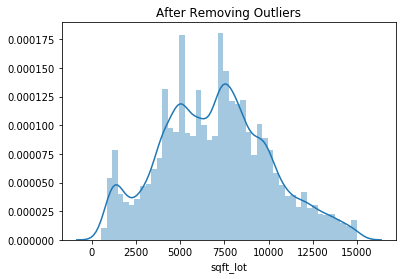

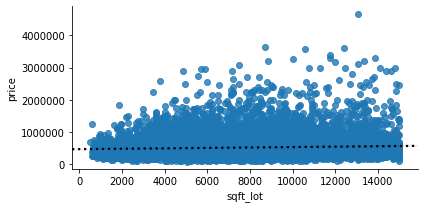

In [25]:
no_outs = data[data['sqft_lot']<=sqft_lot_cutoff]
plt.title('After Removing Outliers')
sns.distplot(no_outs['sqft_lot'])
plt.show();
sns.lmplot(x = 'sqft_lot', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 15000 sqft lots (15% of the data, 3239 entries)
- Relationship: No observable relationship.

#### floors

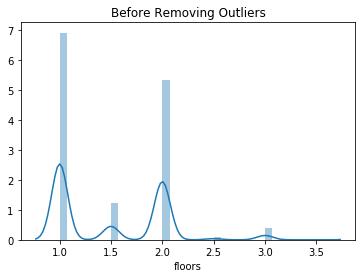

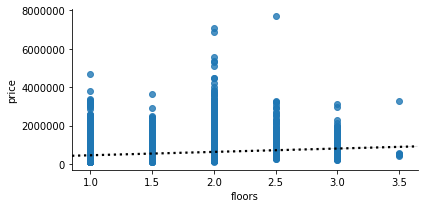

In [26]:
plt.title('Before Removing Outliers')
sns.distplot(data['floors'])
plt.show();
sns.lmplot(x = 'floors', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: potentially polynomial, with a peak at 2 floors.

#### waterfront

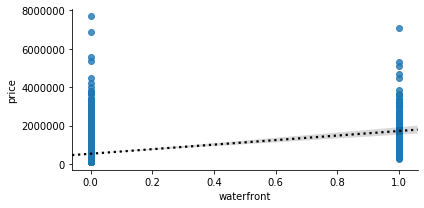

In [27]:
sns.lmplot(x = 'waterfront', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: Observably Linear. Prices rise along the waterfront.

#### view

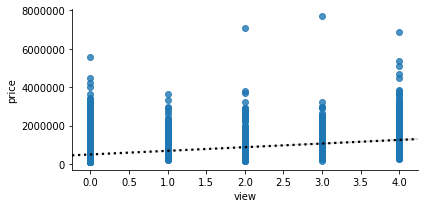

In [28]:
sns.lmplot(x = 'view', y = 'price', data=data, 
           height=3, aspect= 2, 
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

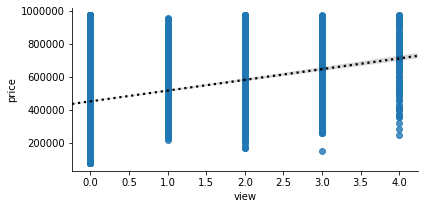

In [29]:
affordable = data[data['price']<=price_cutoff]
sns.lmplot(x = 'view', y = 'price', data=affordable,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

Relationship: Observably linear. Prices rise as number of views increases.

#### condition

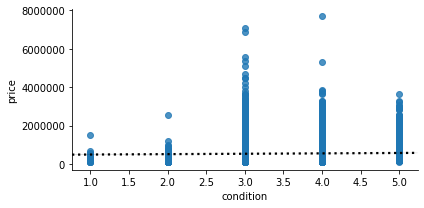

In [30]:
sns.lmplot(x = 'condition', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

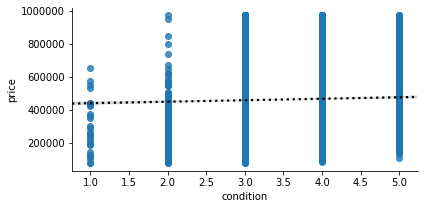

In [31]:
sns.lmplot(x = 'condition', y = 'price', data=affordable,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

Relationship: No observable relationship.

#### grade

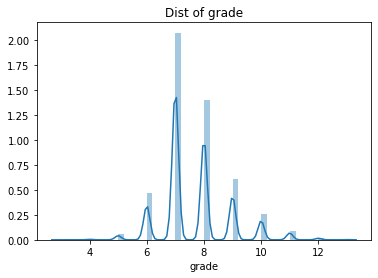

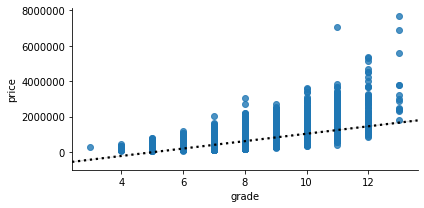

In [32]:
plt.title('Dist of grade')
sns.distplot(data['grade'])
plt.show();
sns.lmplot(x = 'grade', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: Observably linear. Prices rise and grade improves. Potentially better accounted for with polynomial factoring.

#### sqft_above

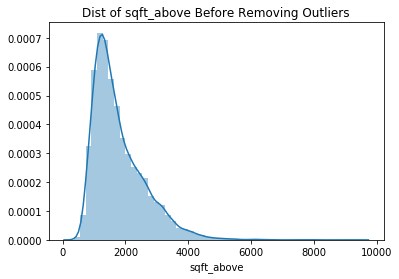

In [33]:
plt.title('Dist of sqft_above Before Removing Outliers')
sns.distplot(data['sqft_above'])
plt.show();

In [34]:
sqft_above_cutoff = data['sqft_above'].quantile(.99)
sqft_above_cutoff

4370.0

In [35]:
(data[data['sqft_above']>sqft_above_cutoff]['sqft_above']
 .describe())

count     215.000000
mean     5118.995349
std       854.818894
min      4380.000000
25%      4565.000000
50%      4830.000000
75%      5370.000000
max      9410.000000
Name: sqft_above, dtype: float64

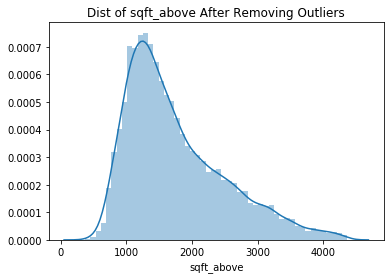

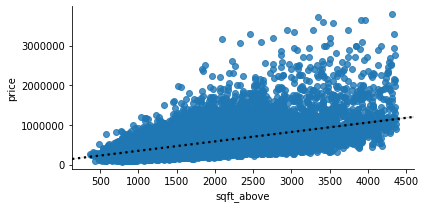

In [36]:
no_outs = data[data['sqft_above']<=sqft_above_cutoff]
plt.title('Dist of sqft_above After Removing Outliers')
sns.distplot(no_outs['sqft_above'])
plt.show();
sns.lmplot(x = 'sqft_above', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 4370 sqft of living space above ground. (1% of the data, 215 entries)
- Relationship: Observably linear. Prices rise as sqft of living space above ground increases. Potentially better accounted for with polynomial factoring.

#### sqft_basement

In [37]:
#Trying to convert sqft_basement to float called an error.
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
4130.0        1
2500.0        1
1248.0        1
2360.0        1
1816.0        1
Name: sqft_basement, Length: 304, dtype: int64

The ? in the sqft_basement column won't work. I'll use the other data I have to deduce the values for this column. 

In [38]:
data['sqft_basement']=(data['sqft_living']-data['sqft_above'])
data['sqft_basement'].describe()

count    21597.000000
mean       291.725008
std        442.667800
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

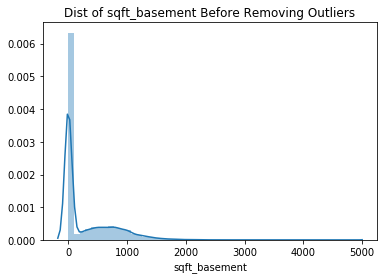

In [39]:
plt.title('Dist of sqft_basement Before Removing Outliers')
sns.distplot(data['sqft_basement'])
plt.show();

In [40]:
sqft_basement_cutoff = data['sqft_basement'].quantile(.995)
sqft_basement_cutoff

1870.0

In [41]:
(data[data['sqft_basement']>
      sqft_basement_cutoff]['sqft_basement'].describe())

count     103.000000
mean     2245.815534
std       452.596880
min      1880.000000
25%      2005.000000
50%      2100.000000
75%      2320.000000
max      4820.000000
Name: sqft_basement, dtype: float64

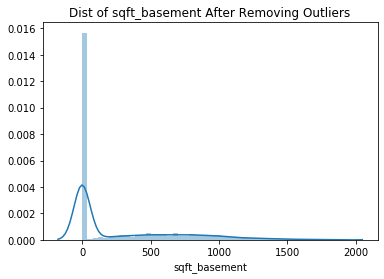

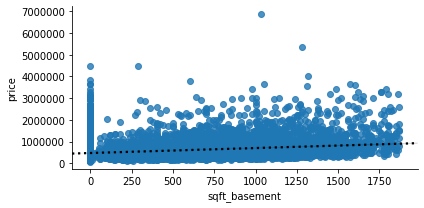

In [42]:
no_outs = data[data['sqft_basement']<=sqft_basement_cutoff]
plt.title('Dist of sqft_basement After Removing Outliers')
sns.distplot(no_outs['sqft_basement'])
plt.show();
sns.lmplot(x = 'sqft_basement', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: houses with basements larger than 1870 sqft. (.5% of the data, 103 entries)
- Relationship: Observably linear, with a skewed distribution toward 0. Prices rise as sqft of basement space increases.  

#### lat

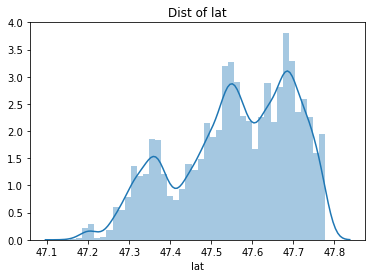

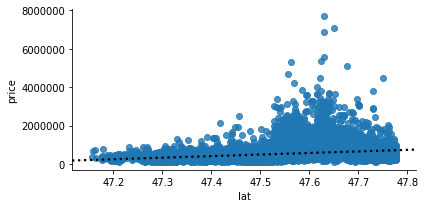

In [43]:
plt.title('Dist of lat')
sns.distplot(data['lat'])
plt.show();
sns.lmplot(x = 'lat', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: Not observably linear. Data will be used in feature creation to establish geography based metrics.

#### long

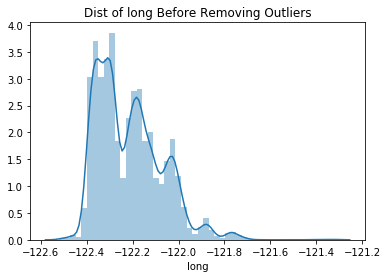

In [44]:
plt.title('Dist of long Before Removing Outliers')
sns.distplot(data['long'])
plt.show();

In [45]:
long_cutoff = data['long'].quantile(.99)
long_cutoff

-121.78299999999999

In [46]:
(data[data['long']>long_cutoff]['long']
 .describe())

count    213.000000
mean    -121.723042
std        0.107914
min     -121.782000
25%     -121.772000
50%     -121.758000
75%     -121.731000
max     -121.315000
Name: long, dtype: float64

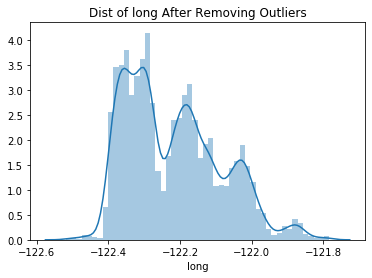

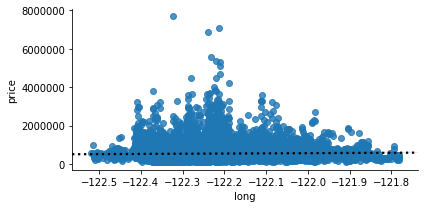

In [47]:
no_outs = data[data['long']<=long_cutoff]
plt.title('Dist of long After Removing Outliers')
sns.distplot(no_outs['long'])
plt.show();
sns.lmplot(x = 'long', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: longitudes East of -121.783. (1% of the data, 213 entries)
- Relationship: Not observably linear. Data will be used in feature creation to establish geography based metrics.

#### sqft_living15

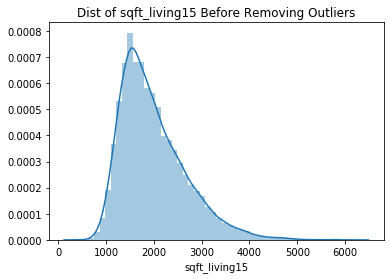

In [48]:
plt.title('Dist of sqft_living15 Before Removing Outliers')
sns.distplot(data['sqft_living15'])
plt.show();

In [49]:
sqft_living15_cutoff = data['sqft_living15'].quantile(.99)
sqft_living15_cutoff

4080.0

In [50]:
(data[data['sqft_living15']>
      sqft_living15_cutoff]['sqft_living15']
 .describe())

count     214.000000
mean     4539.663551
std       414.987685
min      4090.000000
25%      4230.000000
50%      4440.000000
75%      4730.000000
max      6210.000000
Name: sqft_living15, dtype: float64

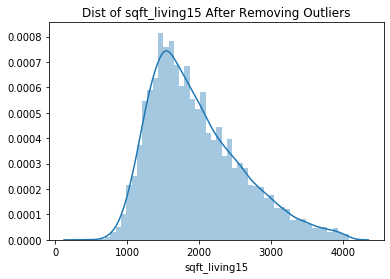

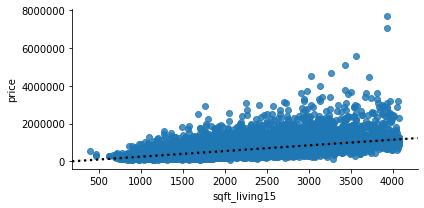

In [51]:
no_outs = data[data['sqft_living15']<=sqft_living15_cutoff]
plt.title('Dist of sqft_living15 After Removing Outliers')
sns.distplot(no_outs['sqft_living15'])
plt.show();
sns.lmplot(x = 'sqft_living15', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Ouliers Dropped: houses where closest 15 neighbors average sqft of living space is greater than 4,080. (1% of data, 214 entries)
- Relationship: Observably linear. Prices rise as sqft of neighbors living space increases. Potentially better accounted for with polynomial factoring.

#### sqft_lot15

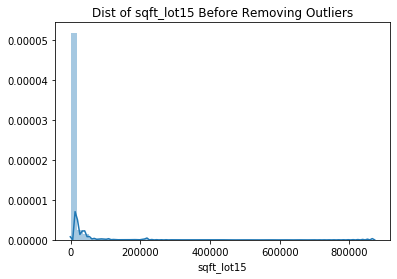

In [52]:
plt.title('Dist of sqft_lot15 Before Removing Outliers')
sns.distplot(data['sqft_lot15'])
plt.show();

In [53]:
sqft_lot15_cutoff = data['sqft_lot15'].quantile(.85)
sqft_lot15_cutoff

13000.0

In [54]:
(data[data['sqft_lot15']>sqft_lot15_cutoff]['sqft_lot15']
 .describe())

count      3234.000000
mean      46487.047928
std       59905.107213
min       13001.000000
25%       15939.250000
50%       24933.000000
75%       43995.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

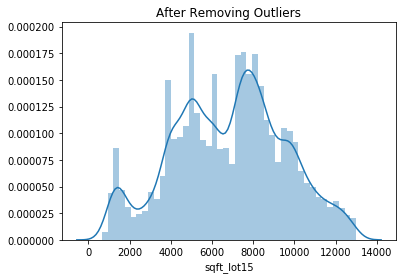

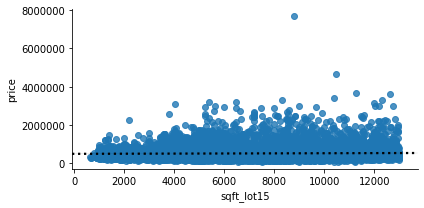

In [55]:
no_outs = data[data['sqft_lot15']<=sqft_lot15_cutoff]
plt.title('After Removing Outliers')
sns.distplot(no_outs['sqft_lot15'])
plt.show();
sns.lmplot(x = 'sqft_lot15', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Ouliers Dropped: houses where closest 15 neighbors average sqft of lot is greater than 13,000. (15% of data, 3234 entries)
- Relationship: No obervable relationship.

### Null Values

In [56]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [57]:
display(data['waterfront'].value_counts(dropna=False))
display(data['view'].value_counts(dropna=False))

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

For these particular variables, which are skewed so heavily toward zero, I will simply impute 0.

In [58]:
data.loc[data['waterfront'].isna(), 'waterfront']=0
data.loc[data['view'].isna(), 'view']=0

Considering that so many null values exist yr_renovated column, I will need to be creative. I'll create a column called 'yrs since renovation' by combining the date built or renovated with the date sold. First, I'll impute the value of the date built to replace null values for yr_renovated. Later, I can use that information to create new features that capture the same information in a more succint way. 

In [59]:
data['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [60]:
data.loc[data['yr_renovated'].isna(), 'yr_renovated']=0
data.loc[
    data['yr_renovated']==0,'yr_renovated']=data.loc[
    data['yr_renovated']==0]['yr_built']

In [61]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data[:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,1987.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530,2001,2001.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,0,1995,1995.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0,1963,1963.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730,1960,1960.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0,2003,2003.0,98038,47.3684,-122.031,2390,7570


### Convert datatypes

In [62]:
data['zipcode'].nunique()

70

Zipcode is not a continuous variable. Normally I would need to use one-hot encoding to make it into a useable categorical variable, however, considering the availabilty of location based data and the messiness of creating 70 new categorical variables, I will simply drop the column from the sample.

In [63]:
data.loc[data['waterfront']==1, 'waterfront'] = 'WaterFront'
data.loc[data['waterfront']==0, 'waterfront'] = 'Not'

data['waterfront'].astype('category', copy=False)
wfdummies = pd.get_dummies(data['waterfront'])
data = data.join(wfdummies, how='outer')

#Drop columns to avoid the dummy-trap.
data.drop(['Not', 'zipcode'], axis=1, 
          inplace=True)

### Duplicates

In [64]:
data.duplicated().sum()

0

# Feature Creation

I want to be able to use age to describe the houses, so I'll create a feature that stores their age at sale. 

### Month  and Year Sold

In [65]:
data['date']=pd.to_datetime(data['date'])

data['month_sold'] = np.array([date[5:7] 
                               for date 
                               in data['date'].astype(str)])
data['month_sold'] = data['month_sold'].astype('int64')

data['year_sold'] = np.array([date[:4] 
                               for date 
                               in data['date'].astype(str)])
data['year_sold'] = data['year_sold'].astype('int64')

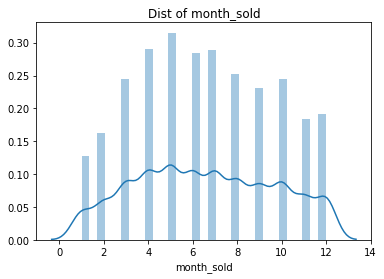

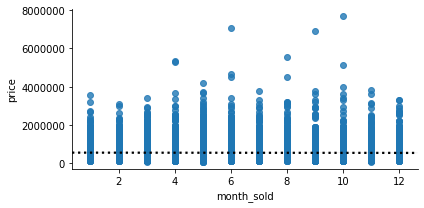

In [66]:
plt.title('Dist of month_sold')
sns.distplot(data['month_sold'])
plt.show();
sns.lmplot(x = 'month_sold', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: No obervable relationship.

### Age

In [67]:
data['age'] = data['year_sold']-data['yr_built']

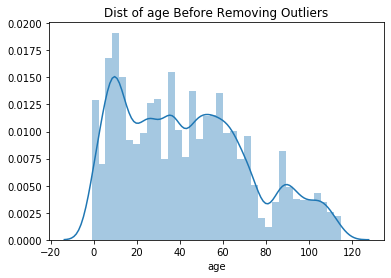

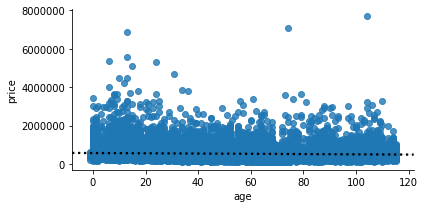

In [68]:
plt.title('Dist of age Before Removing Outliers')
sns.distplot(data['age'])
plt.show();
sns.lmplot(x = 'age', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: No obervable relationship.

### Years Since Renovation

In [69]:
data['yrs_reno'] = data['year_sold']- data['yr_renovated']
data['yrs_reno'].describe()

count    21597.000000
mean        41.377830
std         28.950873
min         -1.000000
25%         16.000000
50%         37.000000
75%         61.000000
max        115.000000
Name: yrs_reno, dtype: float64

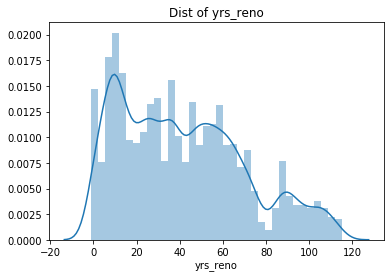

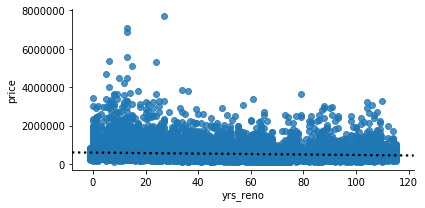

In [70]:
plt.title('Dist of yrs_reno')
sns.distplot(data['yrs_reno'])
plt.show();
sns.lmplot(x = 'yrs_reno', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Ouliers Dropped: None.
- Relationship: Obervably linear. Prices decrease slightly as years since renovation increase.

### Renovated?
I'll also add a categorical variable that can be used to determine if renovation itself is a meaningful indicator of value. 

In [71]:
data.loc[data['yrs_reno']-data['age']<0, 
         'Renovated?']='Renovated'
data.loc[data['yrs_reno']-data['age']==0, 
         'Renovated?']='Not'
data['Renovated?'].value_counts(dropna=False)

Not          20853
Renovated      744
Name: Renovated?, dtype: int64

In [72]:
data['Renovated?'].astype('category', copy=False)
rendummies = pd.get_dummies(data['Renovated?'])
data = data.join(rendummies, how='outer')
data.drop(['Not'], axis=1, inplace=True)

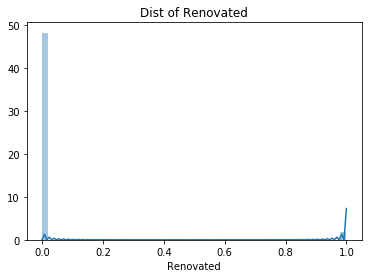

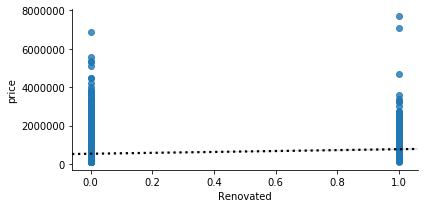

In [73]:
plt.title('Dist of Renovated')
sns.distplot(data['Renovated'])
plt.show();
sns.lmplot(x = 'Renovated', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Ouliers Dropped: None.
- Relationship: Observable linear relationship. Prices rise with renovation.

### City Data
A more decipherable way to utilize the latitude and longitude data is to calculate the distance between each house and the major cities in King County. I can use that information to estimate what city that house resides in, providing another means for analysis. 

I'll use the haversine formula to calculate the miles of distance from the center of particular cities to each house. I'll then use that formula to create columns for the distance to each city and additional columns for the categorical information of what city each house resides in. For this analysis I'll use the largest 5 cities by population in the King County area. 

In [74]:
def haversine(city):
    """
    Return distance in miles between house and city.
    
    Parameters
    city-- tuple, coordinates(lon,lat) for a city
    
    """
    dists = []
    for i in range(0,len(data['long'])):
        lon1, lat1, lon2, lat2 = map(radians, 
                                     [data['long'][i],
                                      data['lat'][i],
                                      city[0], city[1]])
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = (sin(dlat/2)**2 + cos(lat1) 
             * cos(lat2) * sin(dlon/2)**2)
        c = 2 * asin(sqrt(a)) 
        r = 3956 # Radius of earth in miles. 
        dists.append(round(c*r,2))
    return np.array(dists)       

In [75]:
Seattle = (-122.335167, 47.608013, 'Seattle')
Bellevue = (-122.1994444, 47.6105556, 'Bellevue')
Renton = (-122.2158333, 47.4830556, 'Renton') 
Kent = (-122.2336111, 47.3811111, 'Kent')
Federal_Way = (-122.3113889, 47.3225, 'Federal Way')

city_list = [Seattle, Bellevue, Renton, 
             Kent, Federal_Way]

for city in city_list:
    data['dist_to_{}'.format(city[2])] = haversine(city)

In [76]:
city_dist_cols = [('dist_to_{}'.format(city[2]), city[2]) 
                  for city in city_list]
nearest_cities = []

for i in range(0,len(data['long'])):
    dists = []
    for city_dist in city_dist_cols:
        dists.append(((data[city_dist[0]][i]), city_dist[1]))
    nearest_cities.append(sorted(dists)[0][1])
    
data['nearest_city'] = nearest_cities

In [77]:
data[['dist_to_Seattle', 'dist_to_Bellevue',
     'dist_to_Renton', 'dist_to_Kent',
     'dist_to_Federal Way', 'nearest_city']]

,dist_to_Seattle,dist_to_Bellevue,dist_to_Renton,dist_to_Kent,dist_to_Federal Way,nearest_city
0,7.61,7.37,2.73,9.05,13.27,Renton
1,7.84,9.44,17.12,23.80,27.52,Seattle
2,10.15,8.93,17.61,24.63,28.91,Bellevue
3,6.60,10.94,8.67,12.18,14.21,Seattle
4,13.52,7.20,12.19,18.50,23.82,Bellevue
...,...,...,...,...,...,...
21592,6.32,9.17,16.11,22.59,26.07,Seattle
21593,6.83,10.24,7.08,10.77,13.21,Seattle
21594,1.93,4.77,8.61,15.04,18.78,Seattle
21595,13.40,8.03,7.71,13.09,18.51,Renton


##### nearest_city

In [78]:
data['nearest_city'].value_counts()

Seattle        7210
Bellevue       6482
Renton         3582
Kent           2747
Federal Way    1576
Name: nearest_city, dtype: int64

In [79]:
data['nearest_city'].astype('category', copy=False)
ncdummies = pd.get_dummies(data['nearest_city'])
data = data.join(ncdummies, how='outer')

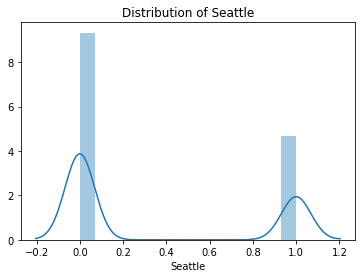

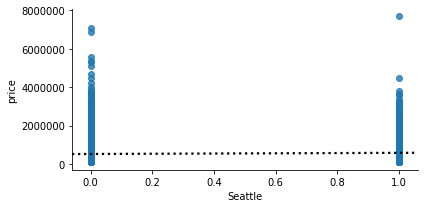


***************



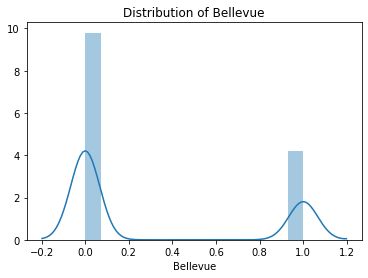

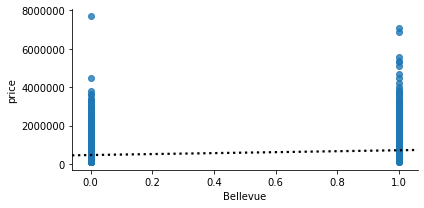


***************



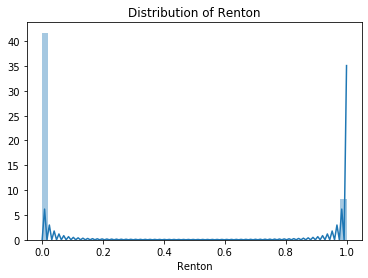

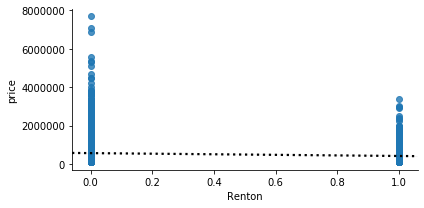


***************



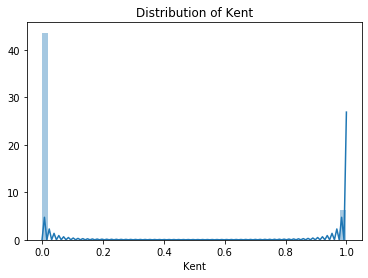

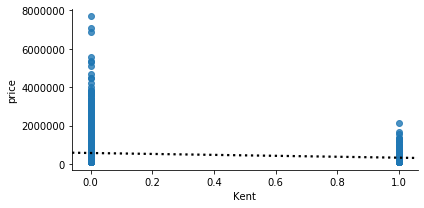


***************



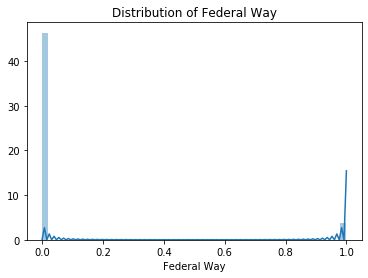

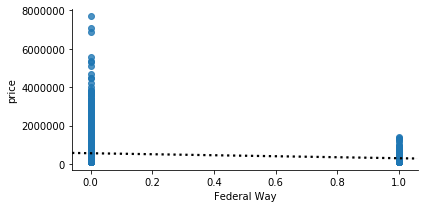


***************



In [80]:
for city in city_list:
    plt.title('Distribution of {}'.format(city[2]))
    sns.distplot(data[city[2]])
    plt.show();
    sns.lmplot(x = city[2], y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
    plt.show();  
    print('\n***************\n')

- Outliers Dropped: None.
- Relationship: Observable linear relationship. Prices rise in Seattle and Bellevue. Prices lower in Renton, Kent and Federal Way.

### distance data
In order to avoid multicolinearity and simply have a more accessble metric, I will drop variables for all distances except for dist_to_Seattle, because Seattle is by far the largest city in the area, it may provide insight in the model.

In [81]:
data.drop(['dist_to_Bellevue', 'dist_to_Kent', 
           'dist_to_Federal Way','dist_to_Renton'], axis=1,
          inplace=True)

##### dist_to_Seattle

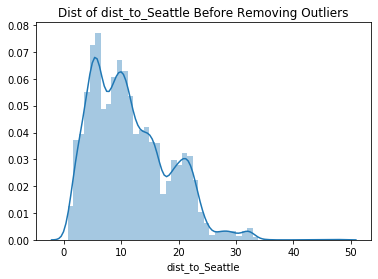

In [82]:
plt.title('Dist of dist_to_Seattle Before Removing Outliers')
sns.distplot(data['dist_to_Seattle'])
plt.show();

In [83]:
dist_to_Seattle_cutoff = (data['dist_to_Seattle']
                          .quantile(.995))
dist_to_Seattle_cutoff

32.1602

In [84]:
(data[data['dist_to_Seattle']>
      dist_to_Seattle_cutoff]['dist_to_Seattle']
 .describe())

count    108.000000
mean      34.933519
std        4.900918
min       32.170000
25%       32.437500
50%       32.800000
75%       33.185000
max       47.990000
Name: dist_to_Seattle, dtype: float64

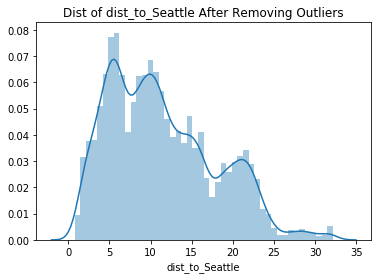

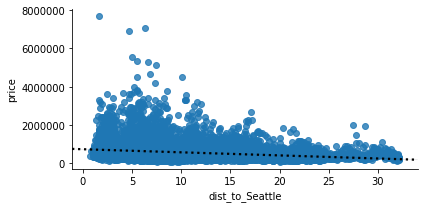

In [85]:
no_outs = (data[data['dist_to_Seattle']
                <= dist_to_Seattle_cutoff])
plt.title('Dist of dist_to_Seattle After Removing Outliers')
sns.distplot(no_outs['dist_to_Seattle'])
plt.show();
sns.lmplot(x = 'dist_to_Seattle', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: houses farther than 32.16 miles from downtoen Seattle. (.5% of the data, 108 entries)  
- Relationship: Observably linear. Prices decrease the farther from Seattle.

### Size Relative to Neighbors

I'd like to test the old real estate addage that the biggest house on the block has lower than expected value by creating an additional feature that tracks the size of a home compared with its nearst 15 neighbors.

In [86]:
data['rel_size'] = (data['sqft_living']
                           /data['sqft_living15'])

In [87]:
data.head()[['sqft_living', 'sqft_living15', 
             'rel_size']]

,sqft_living,sqft_living15,rel_size
0,1180,1340,0.880597
1,2570,1690,1.520710
2,770,2720,0.283088
3,1960,1360,1.441176
4,1680,1800,0.933333


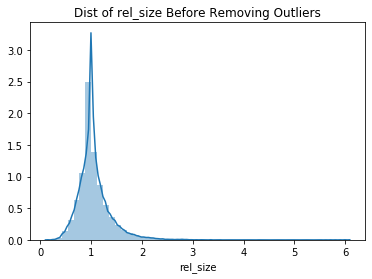

In [88]:
plt.title('Dist of rel_size Before Removing Outliers')
sns.distplot(data['rel_size'])
plt.show();

In [89]:
rel_size_cutoff = data['rel_size'].quantile(.99)
rel_size_cutoff

2.1840031840796024

In [90]:
(data[data['rel_size']>
      rel_size_cutoff]['rel_size']
 .describe())

count    216.000000
mean       2.568278
std        0.502213
min        2.184080
25%        2.263473
50%        2.414929
75%        2.716094
max        6.000000
Name: rel_size, dtype: float64

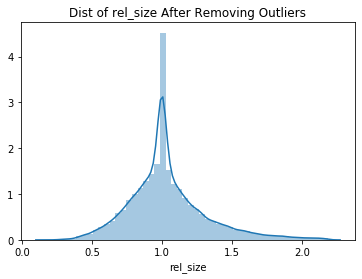

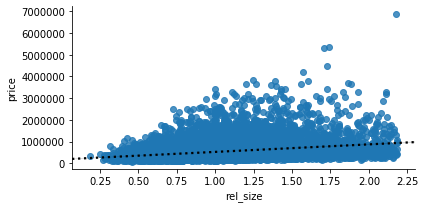

In [91]:
no_outs = data[data['rel_size']<=rel_size_cutoff]
plt.title('Dist of rel_size After Removing Outliers')
sns.distplot(no_outs['rel_size'])
plt.show();
sns.lmplot(x = 'rel_size', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: houses where square footage is more than 2.18 times that of closest 15 neighbors. (1% of the data, 216 entries)  
- Relationship: Observably linear. Price rises with relative size of the house.

# Cleaning

### Drop Outliers

In [92]:
data = data[data['price'] < price_cutoff]
data = data[data['bedrooms'] < bedrooms_cutoff]
data = data[data['bathrooms'] < bathrooms_cutoff] 
data = data[data['sqft_living'] <= sqft_living_cutoff] 
data = data[data['sqft_lot'] <= sqft_lot_cutoff] 
data = data[data['long']<=long_cutoff] 
data = data[data['sqft_basement']<=sqft_basement_cutoff] 
data = data[data['sqft_living15']<=sqft_living15_cutoff] 
data = data[data['sqft_lot15']<=sqft_lot15_cutoff] 
data = data[data['rel_size']<=rel_size_cutoff] 
data = data[data['dist_to_Seattle']<= dist_to_Seattle_cutoff] 

### Drop unnecessary Columns

In [93]:
data.drop(['date', 'condition', 
           'sqft_lot', 'sqft_lot15',
           'id', 'year_sold', 'yr_built',
           'yr_renovated', 'Renovated?', 
           'waterfront', 'nearest_city'],
           axis=1, inplace=True)

In [94]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,...,age,yrs_reno,Renovated,dist_to_Seattle,Bellevue,Federal Way,Kent,Renton,Seattle,rel_size
count,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,...,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000
mean,451099.268909,3.248001,1.986395,1843.568073,1.474327,0.123847,7.410958,1598.631411,244.936662,47.561836,...,44.348543,42.711044,0.027364,10.851313,0.253351,0.074284,0.126491,0.159697,0.386176,1.016069
std,185544.344494,0.814088,0.673267,671.405037,0.546612,0.531672,0.926437,645.571943,373.409015,0.136956,...,30.289441,29.935027,0.163148,6.178170,0.434944,0.262240,0.332412,0.366336,0.486887,0.257763
min,80000.000000,1.000000,0.500000,370.000000,1.000000,0.000000,3.000000,370.000000,0.000000,47.200400,...,-1.000000,-1.000000,0.000000,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276119
25%,305000.000000,3.000000,1.500000,1340.000000,1.000000,0.000000,7.000000,1130.000000,0.000000,47.477225,...,16.000000,15.000000,0.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.873579
50%,420000.000000,3.000000,2.000000,1750.000000,1.000000,0.000000,7.000000,1430.000000,0.000000,47.570300,...,44.000000,40.000000,0.000000,9.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,569375.000000,4.000000,2.500000,2260.000000,2.000000,0.000000,8.000000,1930.000000,480.000000,47.681400,...,65.000000,63.000000,0.000000,14.950000,1.000000,0.000000,0.000000,0.000000,1.000000,1.118949
max,974350.000000,5.000000,4.000000,4940.000000,3.500000,4.000000,11.000000,4610.000000,1850.000000,47.777600,...,115.000000,115.000000,1.000000,32.160000,1.000000,1.000000,1.000000,1.000000,1.000000,2.184000


In [95]:
data.to_csv('clean_housing.csv')